<a href="https://colab.research.google.com/github/psar0006/GitExercise/blob/main/Preprocessing_and_data_visualisation_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import sklearn.preprocessing
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import random
import seaborn as sns
from fbprophet import Prophet
from datetime import datetime

Importing Data

In [3]:
df = pd.read_csv('gdrive/My Drive/ADS2002 - Solar Farm/raw.csv')
df = df.drop(['Unnamed: 0'], axis = 1)
df = df.rename(columns={"start_timestamp": "Timestamp", "series_value": "Value", "series_name": "Name"})
df = df.drop([772830, 772831, 772832])
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df= df.set_index('Timestamp')
df1 = df

Splitting Data

In [4]:
df_Building0 = df1.loc[df1['Name'] == 'Building0']
df_Building1 = df1.loc[df1['Name'] == 'Building1']
df_Building3 = df1.loc[df1['Name'] == 'Building3']
df_Building4 = df1.loc[df1['Name'] == 'Building4']
df_Building5 = df1.loc[df1['Name'] == 'Building5']
df_Building6 = df1.loc[df1['Name'] == 'Building6']
df_Solar0 = df1.loc[df1['Name'] == 'Solar0']
df_Solar1 = df1.loc[df1['Name'] == 'Solar1']
df_Solar2 = df1.loc[df1['Name'] == 'Solar2']
df_Solar3 = df1.loc[df1['Name'] == 'Solar3']
df_Solar4 = df1.loc[df1['Name'] == 'Solar4']
df_Solar5 = df1.loc[df1['Name'] == 'Solar5']

Observing NA values

In [5]:
percent_missing_building0 = df_Building0.isnull().sum() * 100 / len(df_Building0)
percent_missing_building1 = df_Building1.isnull().sum() * 100 / len(df_Building1)
percent_missing_building3 = df_Building3.isnull().sum() * 100 / len(df_Building3)
percent_missing_building4 = df_Building4.isnull().sum() * 100 / len(df_Building4)
percent_missing_building5 = df_Building5.isnull().sum() * 100 / len(df_Building5)
percent_missing_building6 = df_Building6.isnull().sum() * 100 / len(df_Building6)
percent_missing_solar0 = df_Solar0.isnull().sum() * 100 / len(df_Solar0)
percent_missing_solar1 = df_Solar1.isnull().sum() * 100 / len(df_Solar1)
percent_missing_solar2 = df_Solar2.isnull().sum() * 100 / len(df_Solar2)
percent_missing_solar3 = df_Solar3.isnull().sum() * 100 / len(df_Solar3)
percent_missing_solar4 = df_Solar4.isnull().sum() * 100 / len(df_Solar4)
percent_missing_solar5 = df_Solar5.isnull().sum() * 100 / len(df_Solar5)

missing_value_df = pd.DataFrame({'percentage_missing_building0': percent_missing_building0,
                                 'percentage_missing_building1': percent_missing_building1,
                                 'percentage_missing_building3': percent_missing_building3,
                                 'percentage_missing_building4': percent_missing_building4,
                                 'percentage_missing_building5': percent_missing_building5,
                                 'percentage_missing_building6': percent_missing_building6,
                                 'percentage_missing_solar0': percent_missing_solar0,
                                 'percentage_missing_solar1': percent_missing_solar1,
                                 'percentage_missing_solar2': percent_missing_solar2,
                                 'percentage_missing_solar3': percent_missing_solar3,
                                 'percentage_missing_solar4': percent_missing_solar4,
                                 'percentage_missing_solar5': percent_missing_solar5})
percent_missing_building0

Name      0.000000
Value    31.855386
dtype: float64

In [6]:
miss = missing_value_df.iloc[1]
miss

percentage_missing_building0    31.855386
percentage_missing_building1     0.145495
percentage_missing_building3     0.348917
percentage_missing_building4    40.361542
percentage_missing_building5    72.144713
percentage_missing_building6     5.413256
percentage_missing_solar0        0.000000
percentage_missing_solar1        0.000000
percentage_missing_solar2        0.000000
percentage_missing_solar3        0.000000
percentage_missing_solar4        0.000000
percentage_missing_solar5        0.000000
Name: Value, dtype: float64

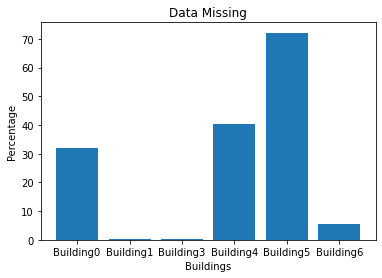

In [7]:
Buildings = ['Building0', 'Building1', 'Building3', 'Building4', 'Building5', 'Building6']
Percentage = [31.86, 0.15, 0.35, 40.36, 72.14, 5.41]
plt.bar(Buildings, Percentage)
plt.title('Data Missing')
plt.xlabel('Buildings')
plt.ylabel('Percentage')
plt.show()

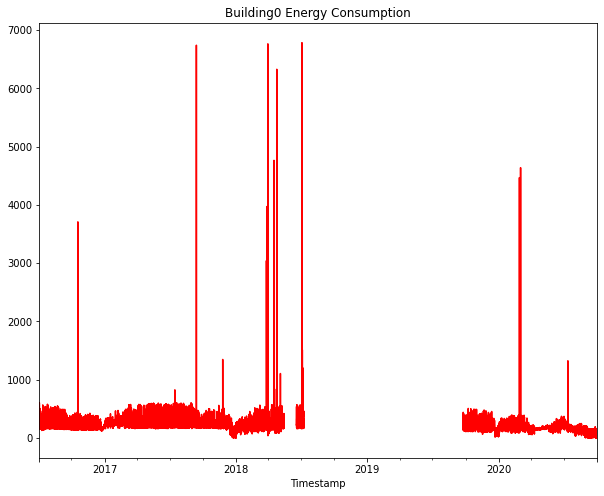

In [8]:
plot1 = df_Building0['Value'].plot(figsize=(10,8), title='Building0 Energy Consumption', color = 'red')

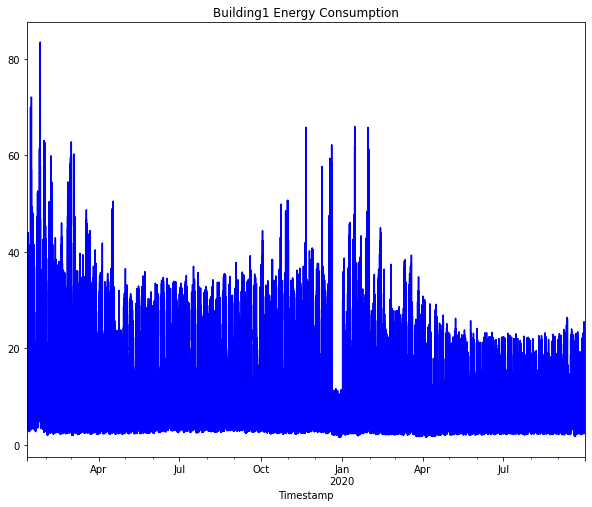

In [ ]:
plot2 = df_Building1['Value'].plot(figsize=(10,8), title='Building1 Energy Consumption', color = 'blue')

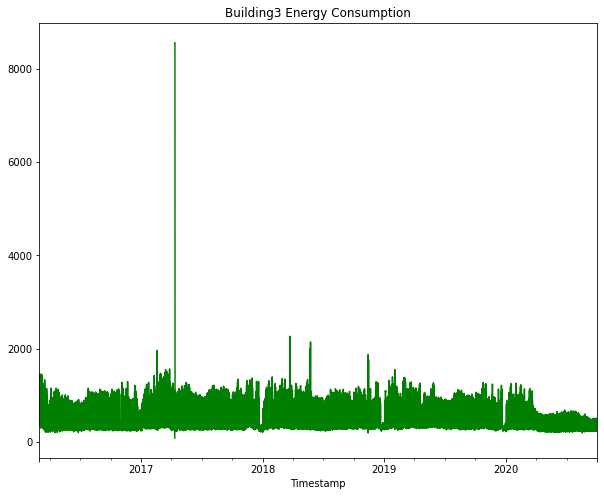

In [ ]:
plot3 = df_Building3['Value'].plot(figsize=(10,8), title='Building3 Energy Consumption', color = 'green')

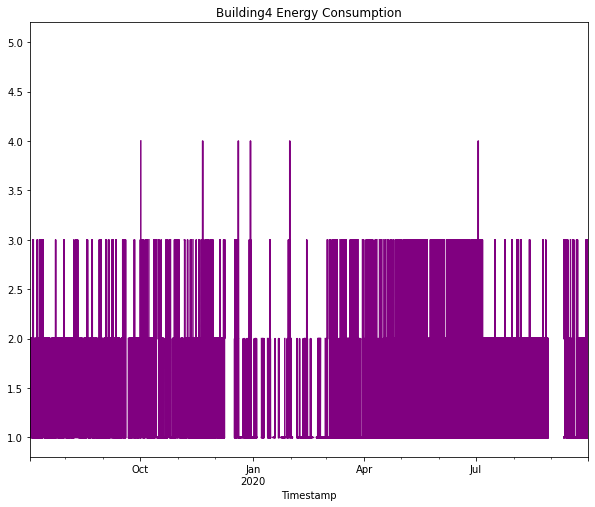

In [ ]:
plot4 = df_Building4['Value'].plot(figsize=(10,8), title='Building4 Energy Consumption', color = 'purple')

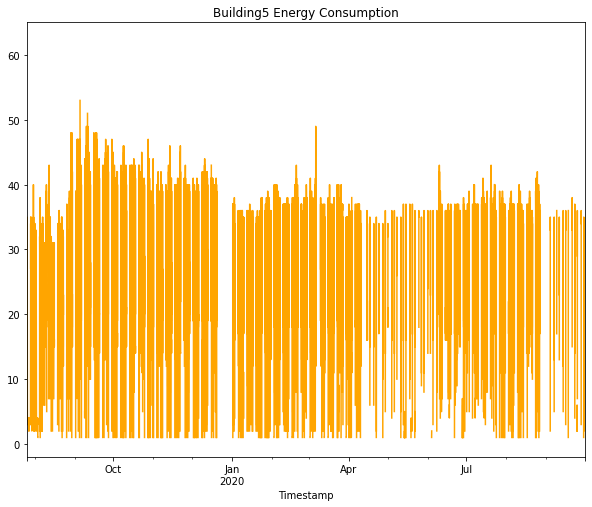

In [ ]:
plot5 = df_Building5['Value'].plot(figsize=(10,8), title='Building5 Energy Consumption', color = 'orange')

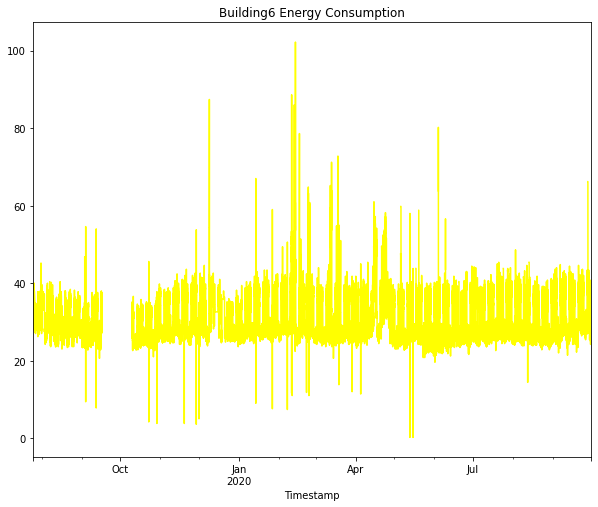

In [ ]:

plot6 = df_Building6['Value'].plot(figsize=(10,8), title='Building6 Energy Consumption', color = 'yellow')

Getting rid of outliers

In [20]:
q0 = df_Building0["Value"].quantile(0.99)
q3 = df_Building3["Value"].quantile(0.99)

In [21]:
df_Building0_o = df_Building0[df_Building0["Value"] < q0]
df_Building3_o = df_Building3[df_Building3["Value"] < q3]

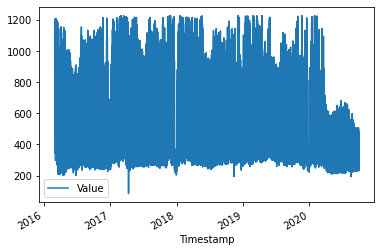

In [22]:
df_Building3_o.plot()

Getting rid of NA values

In [23]:
#Resampling the data to fill NA values, this was done to the data that had a high percentage of data missing above 40%.
df_Building5 = df_Building5.apply(lambda x: np.where(x.isnull(), x.dropna().sample(len(x), replace=True), x))
df_Building4 = df_Building4.apply(lambda x: np.where(x.isnull(), x.dropna().sample(len(x), replace=True), x))
#Using interpolation to fill NA values. this was done to the data that had a low percentage of data missing.
df_Building1 = df_Building1.interpolate(method='linear')
df_Building3_o = df_Building3_o.interpolate(method='linear')
#omitting values prior to NA
df_Building0_o_condensed = df_Building0_o.loc['2019-09-24 00:15:00':]
df_Building0_o_condensed = df_Building0_o_condensed.interpolate(method='linear')
df_Building6_condensed = df_Building6.loc['2019-10-24 00:15:00':]
df_Building6_condensed = df_Building6_condensed.interpolate(method='linear')

Time-series Analysis

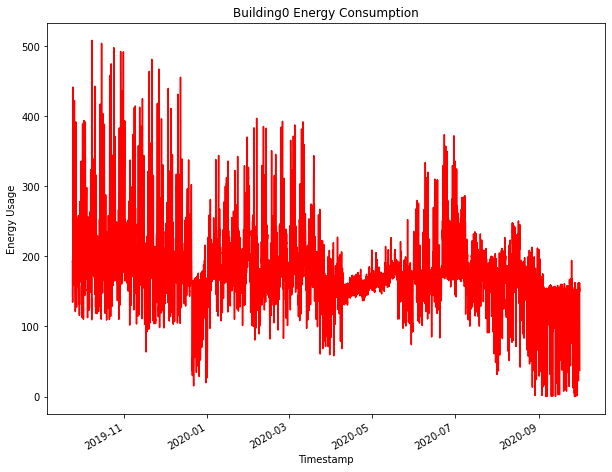

In [24]:
df_Building0_o_condensed['Value'].plot(figsize=(10,8), title='Building0 Energy Consumption', color = 'red', ylabel = "Energy Usage")

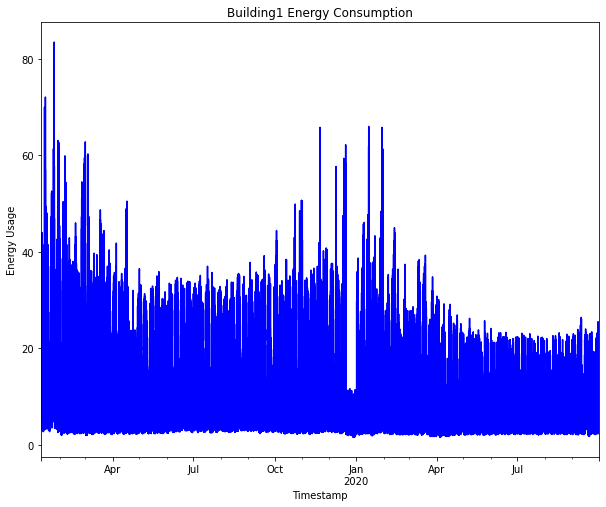

In [25]:
df_Building1['Value'].plot(figsize=(10,8), title='Building1 Energy Consumption', color = 'blue', ylabel = "Energy Usage")

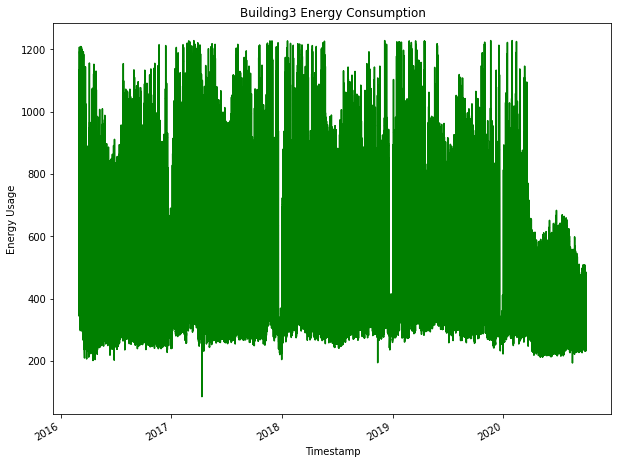

In [26]:
df_Building3_o['Value'].plot(figsize=(10,8), title='Building3 Energy Consumption', color = 'green', ylabel = "Energy Usage")

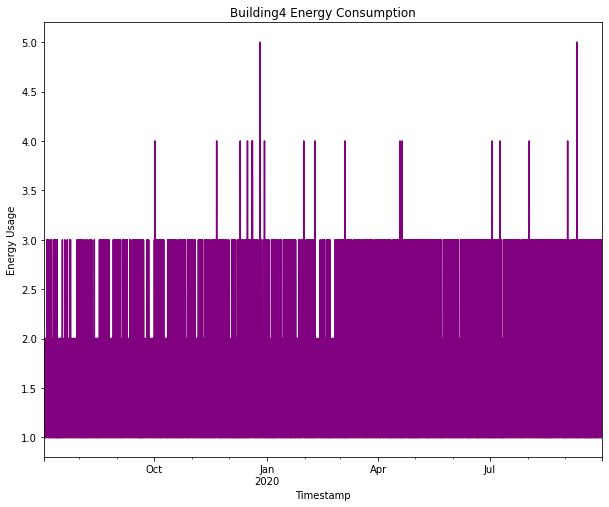

In [27]:
df_Building4['Value'].plot(figsize=(10,8), title='Building4 Energy Consumption', color = 'purple', ylabel = "Energy Usage")

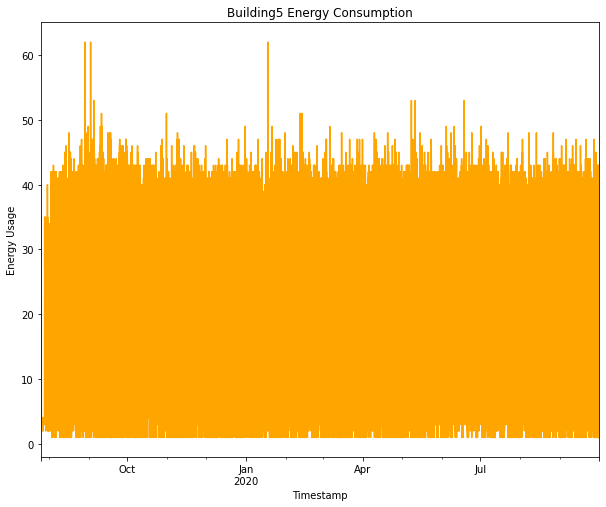

In [28]:
df_Building5['Value'].plot(figsize=(10,8), title='Building5 Energy Consumption', color = 'orange', ylabel = "Energy Usage")

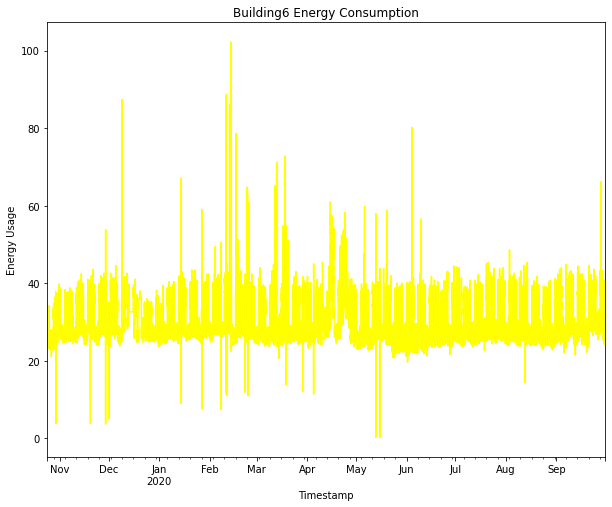

In [29]:
df_Building6_condensed['Value'].plot(figsize=(10,8), title='Building6 Energy Consumption', color = 'yellow', ylabel = "Energy Usage")

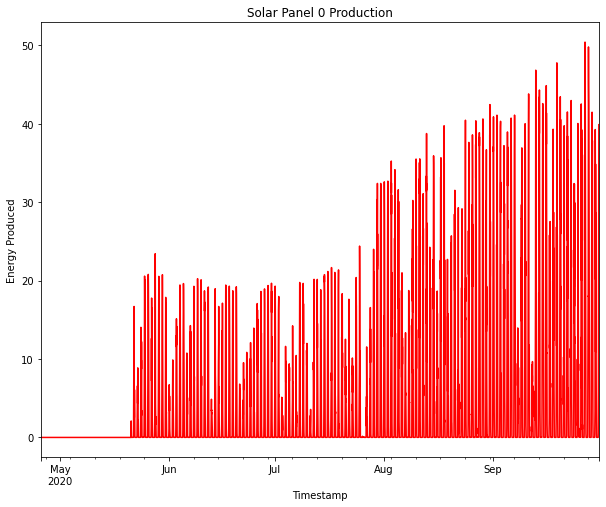

In [30]:
df_Solar0['Value'].plot(figsize=(10,8), title='Solar Panel 0 Production', color = 'red', ylabel = "Energy Produced")

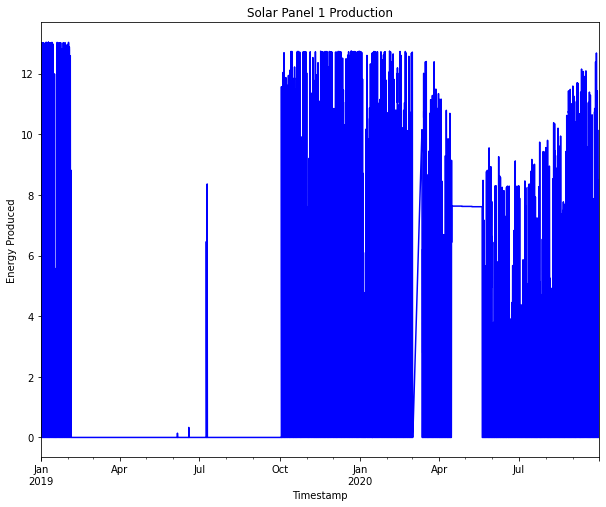

In [31]:
df_Solar1['Value'].plot(figsize=(10,8), title='Solar Panel 1 Production', color = 'blue', ylabel = "Energy Produced")

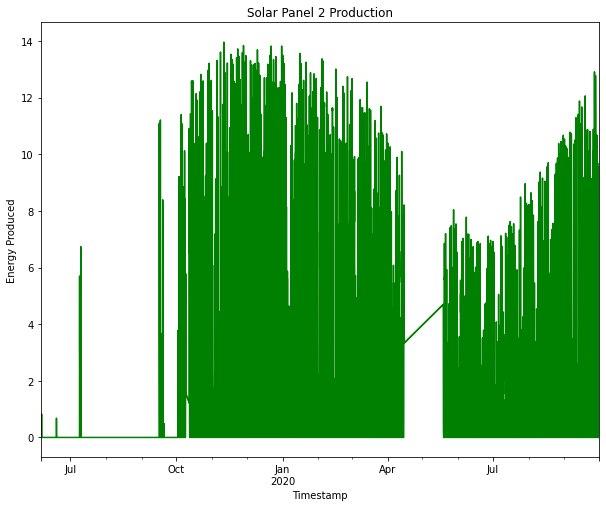

In [32]:
df_Solar2['Value'].plot(figsize=(10,8), title='Solar Panel 2 Production', color = 'green', ylabel = "Energy Produced")

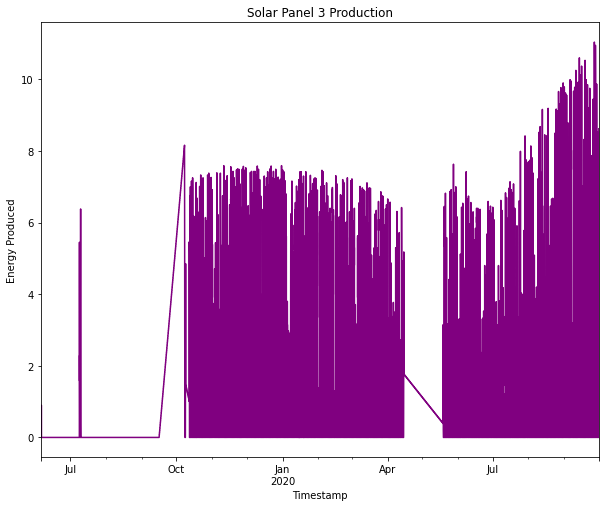

In [33]:
df_Solar3['Value'].plot(figsize=(10,8), title='Solar Panel 3 Production', color = 'purple', ylabel = "Energy Produced")

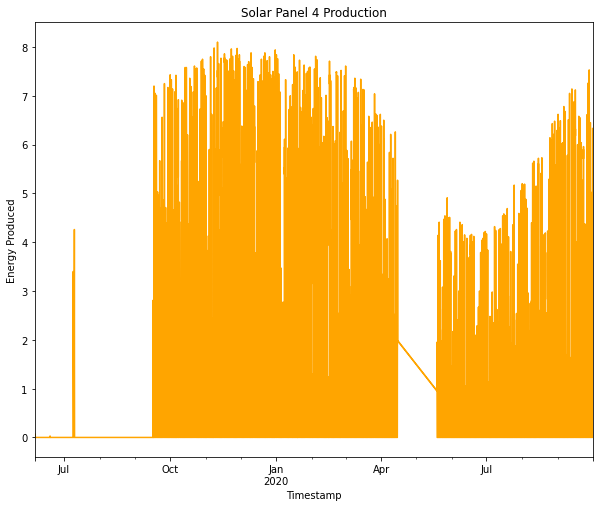

In [34]:
df_Solar4['Value'].plot(figsize=(10,8), title='Solar Panel 4 Production', color = 'orange', ylabel = "Energy Produced")

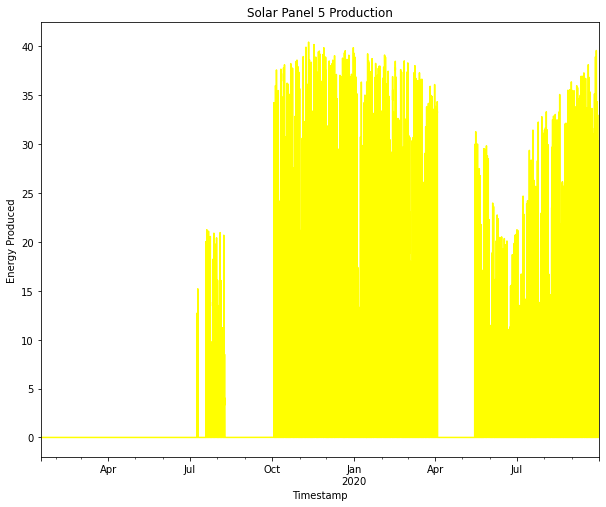

In [35]:
df_Solar5['Value'].plot(figsize=(10,8), title='Solar Panel 5 Production', color = 'yellow', ylabel = "Energy Produced")

Correlation Between Variables

In [36]:
weather = pd.read_csv('gdrive/My Drive/ADS2002 - Solar Farm/Weather.csv')
weather = weather.dropna()
weather['Timestamp'] = pd.to_datetime(weather['Date'])
weather= weather.set_index('Timestamp')
weather = weather.drop(['Date'], axis=1)

In [37]:
### Note: to get a general idea of correlation the solar data was resampled to daily to see correlations with weather


df_Building0_daily = df_Building0_o_condensed.resample('24H').sum()
df_Building1_daily = df_Building1.resample('24H').sum()
df_Building3_daily = df_Building3_o.resample('24H').sum()
df_Building4_daily = df_Building4.resample('24H').sum()
df_Building5_daily = df_Building5.resample('24H').sum()
df_Building6_daily = df_Building6_condensed.resample('24H').sum()
df_Solar0_daily = df_Solar0.resample('24H').sum()
df_Solar1_daily = df_Solar1.resample('24H').sum()
df_Solar2_daily = df_Solar2.resample('24H').sum()
df_Solar3_daily = df_Solar3.resample('24H').sum()
df_Solar4_daily = df_Solar4.resample('24H').sum()
df_Solar5_daily = df_Solar5.resample('24H').sum()

In [38]:
df_Building0_weather_daily = df_Building0_daily.join(weather)
df_Building1_weather_daily = df_Building1_daily.join(weather)
df_Building3_weather_daily = df_Building3_daily.join(weather)
df_Building4_weather_daily = df_Building4_daily.join(weather)
df_Building5_weather_daily = df_Building5_daily.join(weather)
df_Building6_weather_daily = df_Building6_daily.join(weather)
df_Solar0_weather_daily = df_Solar0_daily.join(weather)
df_Solar1_weather_daily = df_Solar1_daily.join(weather)
df_Solar2_weather_daily = df_Solar2_daily.join(weather)
df_Solar3_weather_daily = df_Solar3_daily.join(weather)
df_Solar4_weather_daily = df_Solar4_daily.join(weather)
df_Solar5_weather_daily = df_Solar5_daily.join(weather)

In [39]:
corr_solar5 = df_Solar5_weather_daily.corr()
corr_solar3 = df_Solar3_weather_daily.corr()
corr_solar1 = df_Solar1_weather_daily.corr()
corr_building1 = df_Building1_weather_daily.corr()
corr_building0 = df_Building0_weather_daily.corr()
corr_building3 = df_Building3_weather_daily.corr()
corr_building4 = df_Building4_weather_daily.corr()
corr_building5 = df_Building5_weather_daily.corr()
corr_building6 = df_Building6_weather_daily.corr()
corr_solar0 = df_Solar0_weather_daily.corr()
corr_solar2 = df_Solar2_weather_daily.corr()
corr_solar4 = df_Solar4_weather_daily.corr()

In [ ]:
corr_solar0

,Value,Oly_Max,Mor_Max,Oly_Min,Mor_Min,Oly_Rain,Oak_Rain,Mor_Rain,Oly_Solar,Oak_Solar,Mor_Solar
Value,1.000000,0.186982,0.169911,0.074444,0.044132,-0.162595,-0.156574,-0.129101,0.420683,0.461023,0.451335
Oly_Max,0.186982,1.000000,0.984040,0.616623,0.527545,-0.089820,-0.093702,-0.094006,0.575917,0.604173,0.570730
Mor_Max,0.169911,0.984040,1.000000,0.615914,0.523649,-0.092115,-0.099506,-0.100122,0.580480,0.607301,0.574503
Oly_Min,0.074444,0.616623,0.615914,1.000000,0.959912,0.144499,0.134717,0.145323,0.312607,0.299902,0.315617
Mor_Min,0.044132,0.527545,0.523649,0.959912,1.000000,0.178742,0.164763,0.180165,0.230518,0.212217,0.234762
Oly_Rain,-0.162595,-0.089820,-0.092115,0.144499,0.178742,1.000000,0.933108,0.950479,-0.189082,-0.172925,-0.164266
Oak_Rain,-0.156574,-0.093702,-0.099506,0.134717,0.164763,0.933108,1.000000,0.949264,-0.211301,-0.189410,-0.186099
Mor_Rain,-0.129101,-0.094006,-0.100122,0.145323,0.180165,0.950479,0.949264,1.000000,-0.192150,-0.168205,-0.165847
Oly_Solar,0.420683,0.575917,0.580480,0.312607,0.230518,-0.189082,-0.211301,-0.192150,1.000000,0.976968,0.976318
Oak_Solar,0.461023,0.604173,0.607301,0.299902,0.212217,-0.172925,-0.189410,-0.168205,0.976968,1.000000,0.983764


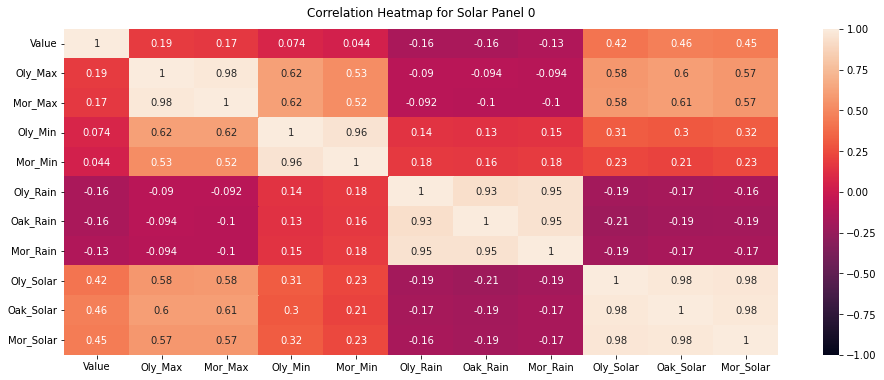

In [40]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(corr_solar0, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap for Solar Panel 0', fontdict={'fontsize':12}, pad=12);


### Copy this code and do correlation plots for all solar panels and buildings

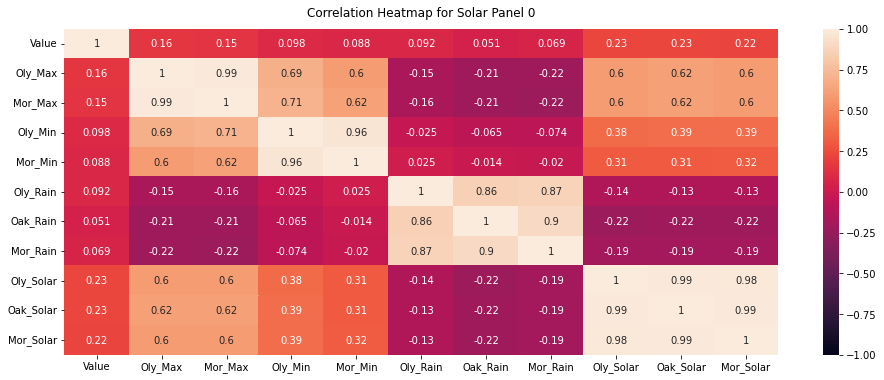

In [41]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(corr_solar1, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap for Solar Panel 1', fontdict={'fontsize':12}, pad=12);

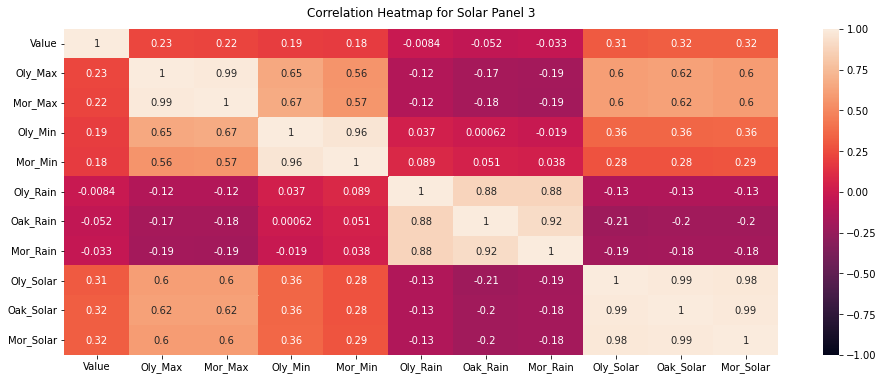

In [42]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(corr_solar3, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap for Solar Panel 3', fontdict={'fontsize':12}, pad=12);

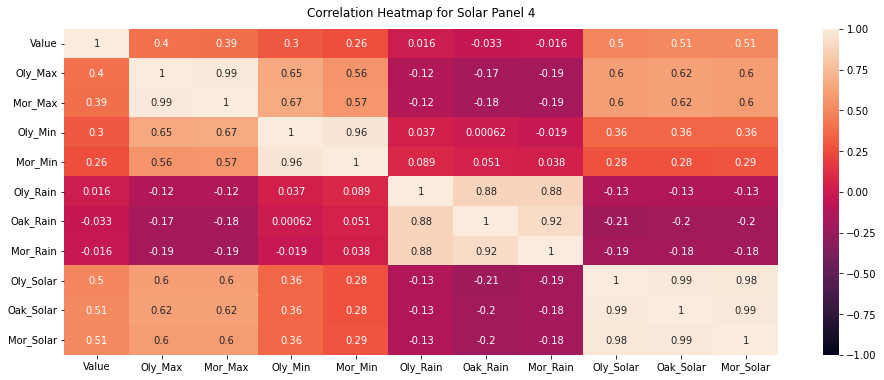

In [44]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(corr_solar4, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap for Solar Panel 4', fontdict={'fontsize':12}, pad=12);

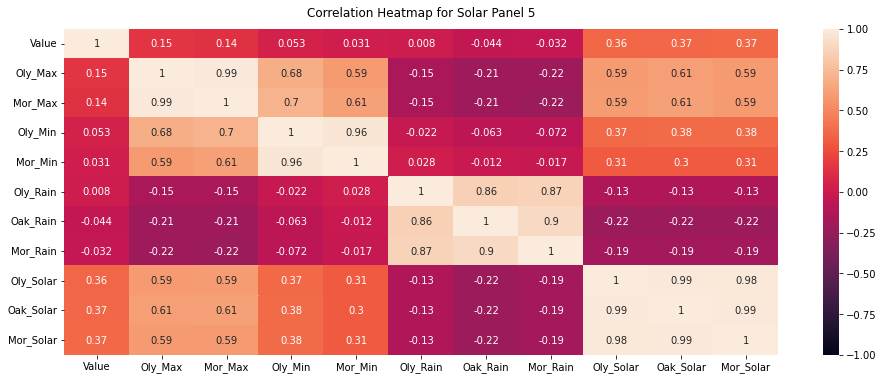

In [45]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(corr_solar5, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap for Solar Panel 5', fontdict={'fontsize':12}, pad=12);

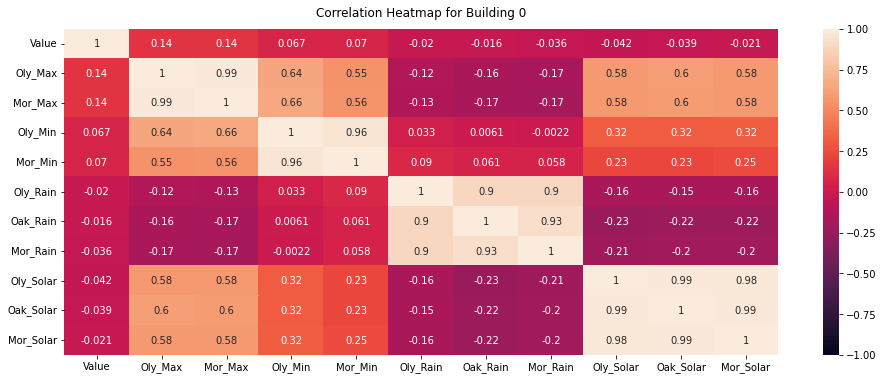

In [46]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
heatmap0 = sns.heatmap(corr_building0, vmin=-1, vmax=1, annot=True)
heatmap0.set_title('Correlation Heatmap for Building 0', fontdict={'fontsize':12}, pad=12);

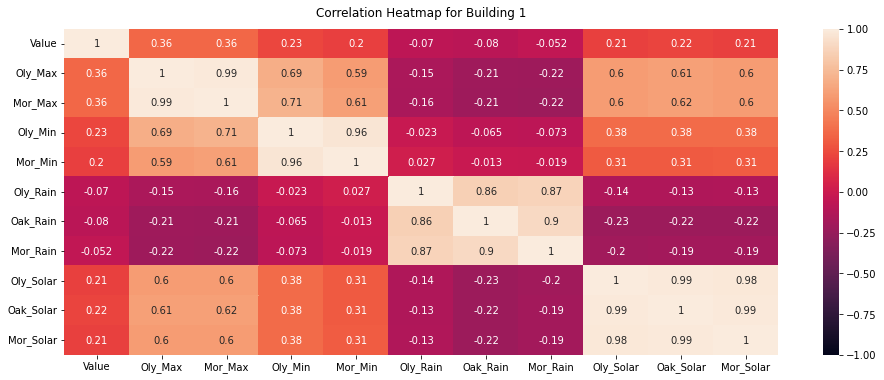

In [47]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
heatmap1 = sns.heatmap(corr_building1, vmin=-1, vmax=1, annot=True)
heatmap1.set_title('Correlation Heatmap for Building 1', fontdict={'fontsize':12}, pad=12);

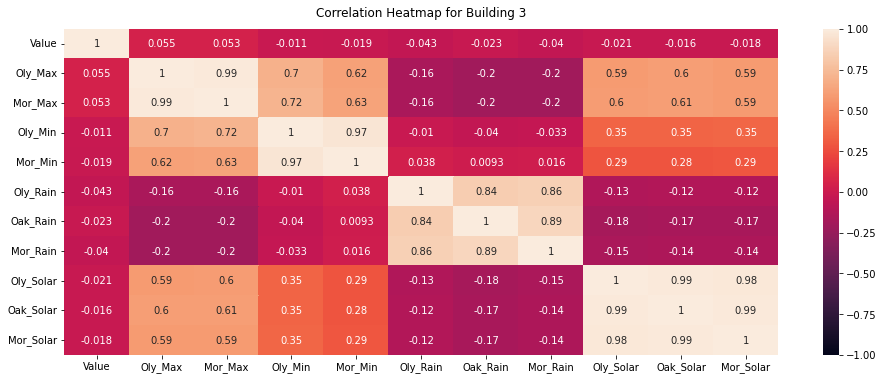

In [50]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
heatmap3 = sns.heatmap(corr_building3, vmin=-1, vmax=1, annot=True)
heatmap3.set_title('Correlation Heatmap for Building 3', fontdict={'fontsize':12}, pad=12);

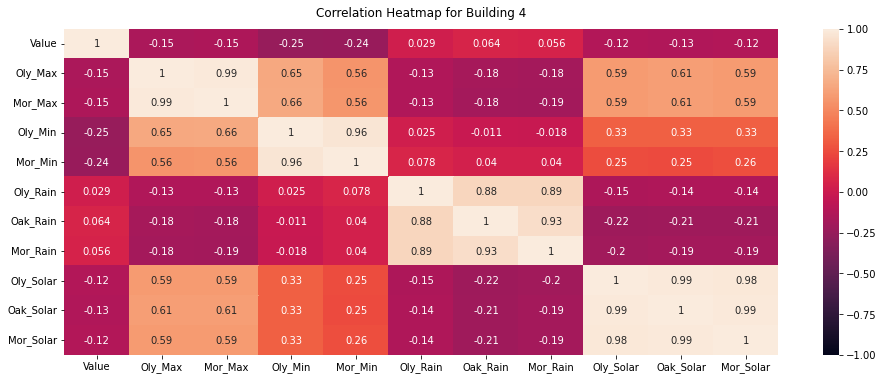

In [48]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
heatmap4 = sns.heatmap(corr_building4, vmin=-1, vmax=1, annot=True)
heatmap4.set_title('Correlation Heatmap for Building 4', fontdict={'fontsize':12}, pad=12);

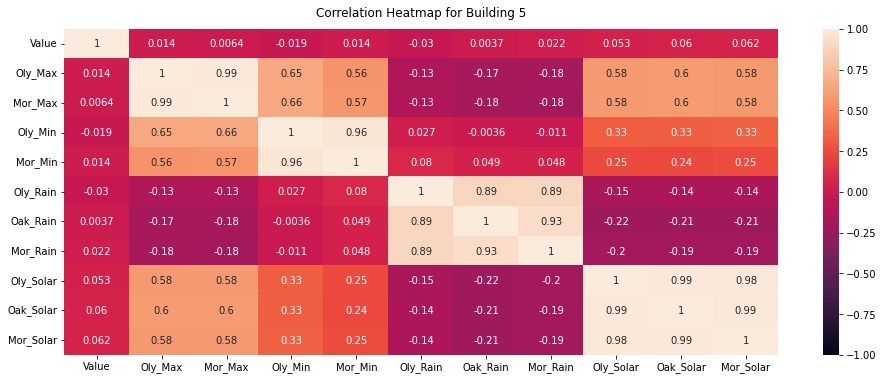

In [49]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
heatmap5 = sns.heatmap(corr_building5, vmin=-1, vmax=1, annot=True)
heatmap5.set_title('Correlation Heatmap for Building 5', fontdict={'fontsize':12}, pad=12);

In [ ]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
heatmap6 = sns.heatmap(corr_building6, vmin=-1, vmax=1, annot=True)
heatmap6.set_title('Correlation Heatmap for Building 6', fontdict={'fontsize':12}, pad=12);

Changing total exposure to 15 miniute data

In [29]:
def into_interval(x):
  return x/96

In [9]:
weather2 = weather.copy(deep=True)
weather_solar_exposure = weather2[['Oak_Solar', 'Oly_Solar', 'Mor_Solar']]

weather_solar_exposure_3h = weather_solar_exposure.resample('3H').asfreq()
weather_solar_exposure_3h = weather_solar_exposure_3h.interpolate(method='ffill')
weather_solar_exposure_3h['Hour'] = weather_solar_exposure_3h.index.hour
weather_solar_exposure_3h['Oly_Solar'] = np.where(weather_solar_exposure_3h['Hour'] == 12, np.NaN, weather_solar_exposure_3h['Oly_Solar'])
weather_solar_exposure_3h['Oak_Solar'] = np.where(weather_solar_exposure_3h['Hour'] == 12, np.NaN, weather_solar_exposure_3h['Oak_Solar'])
weather_solar_exposure_3h['Mor_Solar'] = np.where(weather_solar_exposure_3h['Hour'] == 12, np.NaN, weather_solar_exposure_3h['Mor_Solar'])
weather_solar_exposure_3h['Oly_Solar'] = np.where(weather_solar_exposure_3h['Hour'] == 6, np.NaN, weather_solar_exposure_3h['Oly_Solar'])
weather_solar_exposure_3h['Oak_Solar'] = np.where(weather_solar_exposure_3h['Hour'] == 6, np.NaN, weather_solar_exposure_3h['Oak_Solar'])
weather_solar_exposure_3h['Mor_Solar'] = np.where(weather_solar_exposure_3h['Hour'] == 6, np.NaN, weather_solar_exposure_3h['Mor_Solar'])
weather_solar_exposure_3h['Oly_Solar'] = np.where(weather_solar_exposure_3h['Hour'] == 18, np.NaN, weather_solar_exposure_3h['Oly_Solar'])
weather_solar_exposure_3h['Oak_Solar'] = np.where(weather_solar_exposure_3h['Hour'] == 18, np.NaN, weather_solar_exposure_3h['Oak_Solar'])
weather_solar_exposure_3h['Mor_Solar'] = np.where(weather_solar_exposure_3h['Hour'] == 18, np.NaN, weather_solar_exposure_3h['Mor_Solar'])
weather_solar_exposure_3h['Oly_Solar'] = np.where(weather_solar_exposure_3h['Hour'] < 6, 0, weather_solar_exposure_3h['Oly_Solar'])
weather_solar_exposure_3h['Mor_Solar'] = np.where(weather_solar_exposure_3h['Hour'] < 6, 0, weather_solar_exposure_3h['Mor_Solar'])
weather_solar_exposure_3h['Oak_Solar'] = np.where(weather_solar_exposure_3h['Hour'] < 6, 0, weather_solar_exposure_3h['Oak_Solar'])
weather_solar_exposure_3h['Oly_Solar'] = np.where(weather_solar_exposure_3h['Hour'] > 18, 0, weather_solar_exposure_3h['Oly_Solar'])
weather_solar_exposure_3h['Mor_Solar'] = np.where(weather_solar_exposure_3h['Hour'] > 18, 0, weather_solar_exposure_3h['Mor_Solar'])
weather_solar_exposure_3h['Oak_Solar'] = np.where(weather_solar_exposure_3h['Hour'] > 18, 0, weather_solar_exposure_3h['Oak_Solar'])
weather_solar_exposure_3h


"\nweather_solar_exposure_3h = weather_solar_exposure.resample('3H').asfreq()\nweather_solar_exposure_3h = weather_solar_exposure_3h.interpolate(method='ffill')\nweather_solar_exposure_3h['Hour'] = weather_solar_exposure_3h.index.hour\nweather_solar_exposure_3h['Oly_Solar'] = np.where(weather_solar_exposure_3h['Hour'] == 12, np.NaN, weather_solar_exposure_3h['Oly_Solar'])\nweather_solar_exposure_3h['Oak_Solar'] = np.where(weather_solar_exposure_3h['Hour'] == 12, np.NaN, weather_solar_exposure_3h['Oak_Solar'])\nweather_solar_exposure_3h['Mor_Solar'] = np.where(weather_solar_exposure_3h['Hour'] == 12, np.NaN, weather_solar_exposure_3h['Mor_Solar'])\nweather_solar_exposure_3h['Oly_Solar'] = np.where(weather_solar_exposure_3h['Hour'] == 6, np.NaN, weather_solar_exposure_3h['Oly_Solar'])\nweather_solar_exposure_3h['Oak_Solar'] = np.where(weather_solar_exposure_3h['Hour'] == 6, np.NaN, weather_solar_exposure_3h['Oak_Solar'])\nweather_solar_exposure_3h['Mor_Solar'] = np.where(weather_solar_ex

In [39]:
weather_solar_exposure['Mor_Solar_15min'] = weather_solar_exposure['Mor_Solar'].apply(into_interval)
weather_solar_exposure['Oak_Solar_15min'] = weather_solar_exposure['Oak_Solar'].apply(into_interval)
weather_solar_exposure['Oly_Solar_15min'] = weather_solar_exposure['Oly_Solar'].apply(into_interval)
weather_solar_exposure_int = weather_solar_exposure[['Oak_Solar_15min', 'Oly_Solar_15min', 'Mor_Solar_15min']]
weather_solar_exposure_int_basic = weather_solar_exposure_int.resample('15T').asfreq()
weather_solar_exposure_int_basic = weather_solar_exposure_int_basic.interpolate(method='quadratic')
weather_solar_exposure_int_basic['Hour'] = weather_solar_exposure_int_basic.index.hour
weather_solar_exposure_int_basic


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

,Oak_Solar_15min,Oly_Solar_15min,Mor_Solar_15min,Hour
Timestamp,,,,
2016-01-01 00:00:00,0.226042,0.229167,0.253125,0
2016-01-01 00:15:00,0.227785,0.230809,0.254184,0
2016-01-01 00:30:00,0.229508,0.232434,0.255231,0
2016-01-01 00:45:00,0.231212,0.234041,0.256265,0
2016-01-01 01:00:00,0.232896,0.235630,0.257285,1
...,...,...,...,...
2021-12-06 23:00:00,0.087109,0.085829,0.087918,23
2021-12-06 23:15:00,0.087713,0.086492,0.088836,23
2021-12-06 23:30:00,0.088327,0.087166,0.089767,23


In [35]:
example = df_Solar3.join(weather_solar_exposure_int_basic)
example.corr()

,Value,Oak_Solar_15min,Oly_Solar_15min,Mor_Solar_15min,Hour
Value,1.000000,0.173394,0.167518,0.173106,-0.362298
Oak_Solar_15min,0.173394,1.000000,0.988669,0.988802,-0.000583
Oly_Solar_15min,0.167518,0.988669,1.000000,0.984127,-0.000579
Mor_Solar_15min,0.173106,0.988802,0.984127,1.000000,-0.000532
Hour,-0.362298,-0.000583,-0.000579,-0.000532,1.000000


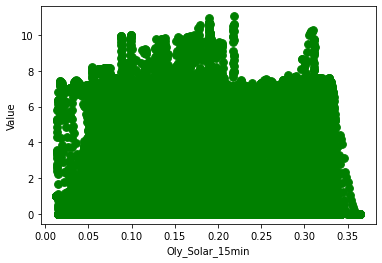

In [37]:
example.plot.scatter(x='Oly_Solar_15min', y='Value', s=60, c='green')

In [ ]:
weather_solar_exposure_3h['Mor_Solar_15min'] = weather_solar_exposure_3h['Mor_Solar'].apply(into_interval)
weather_solar_exposure_3h['Oak_Solar_15min'] = weather_solar_exposure_3h['Oak_Solar'].apply(into_interval)
weather_solar_exposure_3h['Oly_Solar_15min'] = weather_solar_exposure_3h['Oly_Solar'].apply(into_interval)
weather_solar_exposure_int = weather_solar_exposure_3h[['Oak_Solar_15min', 'Oly_Solar_15min', 'Mor_Solar_15min']]
weather_solar_exposure_int = weather_solar_exposure_int.resample('15T').asfreq()
weather_solar_exposure_int['Hour'] = weather_solar_exposure_int.index.hour 
weather_solar_exposure_int['Oak_Solar_15min'] = np.where(weather_solar_exposure_int['Hour'] < 6, 0, weather_solar_exposure_int['Oak_Solar_15min'])
weather_solar_exposure_int['Oak_Solar_15min'] = np.where(weather_solar_exposure_int['Hour'] > 18, 0, weather_solar_exposure_int['Oak_Solar_15min'])
weather_solar_exposure_int['Oly_Solar_15min'] = np.where(weather_solar_exposure_int['Hour'] < 6, 0, weather_solar_exposure_int['Oly_Solar_15min'])
weather_solar_exposure_int['Oly_Solar_15min'] = np.where(weather_solar_exposure_int['Hour'] > 18, 0, weather_solar_exposure_int['Oly_Solar_15min'])
weather_solar_exposure_int['Mor_Solar_15min'] = np.where(weather_solar_exposure_int['Hour'] < 6, 0, weather_solar_exposure_int['Mor_Solar_15min'])
weather_solar_exposure_int['Mor_Solar_15min'] = np.where(weather_solar_exposure_int['Hour'] > 18, 0, weather_solar_exposure_int['Mor_Solar_15min'])
weather_solar_exposure_int = weather_solar_exposure_int.drop(columns='Hour')
#weather_solar_exposure_int.interpolate(method='quadratic', limit_direction='both', limit=None)
weather_solar_exposure_int.loc['2016-01-01 05:45:00' : '2016-01-01 18:00:00']

,Oak_Solar_15min,Oly_Solar_15min,Mor_Solar_15min
Timestamp,,,
2016-01-01 05:45:00,0.000000,0.000000,0.00000
2016-01-01 06:00:00,0.000000,0.000000,0.00000
2016-01-01 06:15:00,0.000000,0.000000,0.00000
2016-01-01 06:30:00,0.000000,0.000000,0.00000
2016-01-01 06:45:00,0.000000,0.000000,0.00000
2016-01-01 07:00:00,0.000000,0.000000,0.00000
2016-01-01 07:15:00,0.000000,0.000000,0.00000
2016-01-01 07:30:00,0.000000,0.000000,0.00000
2016-01-01 07:45:00,0.000000,0.000000,0.00000


In [ ]:
"""
weather2['Oak_Solar_15min'] = weather2['Oak_Solar'].apply(into_interval)
weather2['Oly_Solar_15min'] = weather2['Oly_Solar'].apply(into_interval)
weather2['Mor_Solar_15min'] = weather2['Mor_Solar'].apply(into_interval)
weather_solar_total = weather2[['Oak_Solar', 'Oly_Solar', 'Mor_Solar']]
weather_solar_int = weather2[['Oak_Solar_15min', 'Oly_Solar_15min', 'Mor_Solar_15min']]
weather_solar_int = weather_solar_int.resample('15T').asfreq()
weather_solar_int = weather_solar_int.interpolate(method='polynomial', order=2)
weather_solar_int['Hour'] = weather_solar_int.index.hour
"""

In [ ]:
weather_solar_6h['Oak_Solar_15min'] = weather_solar_6h['Oak_Solar'].apply(into_interval)
weather_solar_6h['Oly_Solar_15min'] = weather_solar_6h['Oly_Solar'].apply(into_interval)
weather_solar_6h['Mor_Solar_15min'] = weather_solar_6h['Mor_Solar'].apply(into_interval)
weather_solar_int_6h = weather_solar_6h[['Oak_Solar_15min', 'Oly_Solar_15min', 'Mor_Solar_15min']]
weather_solar_int_6h = weather_solar_int_6h.resample('15T').asfreq()
weather_solar_int_6h['Hour'] = weather_solar_int_6h.index.hour
weather_solar_int_6h['Oak_Solar_15min'] = np.where(weather_solar_int_6h['Hour'] < 6, 0, weather_solar_int_6h['Oak_Solar_15min'])
weather_solar_int_6h['Oak_Solar_15min'] = np.where(weather_solar_int_6h['Hour'] > 18, 0, weather_solar_int_6h['Oak_Solar_15min'])
weather_solar_int_6h['Oly_Solar_15min'] = np.where(weather_solar_int_6h['Hour'] < 6, 0, weather_solar_int_6h['Oly_Solar_15min'])
weather_solar_int_6h['Oly_Solar_15min'] = np.where(weather_solar_int_6h['Hour'] > 18, 0, weather_solar_int_6h['Oly_Solar_15min'])
weather_solar_int_6h['Mor_Solar_15min'] = np.where(weather_solar_int_6h['Hour'] < 6, 0, weather_solar_int_6h['Mor_Solar_15min'])
weather_solar_int_6h['Mor_Solar_15min'] = np.where(weather_solar_int_6h['Hour'] > 18, 0, weather_solar_int_6h['Mor_Solar_15min'])
weather_solar_int_6h = weather_solar_int_6h.interpolate(method='polynomial', order=2)
weather_solar_int_6h.loc['2016-01-01 06:00:00' : '2016-01-01 18:00:00'].sum()

NameError: ignored

In [ ]:
solar_exposure = weather_solar_int_6h.copy()
example = df_Solar5.join(solar_exposure)
example.corr()

,Value,Oak_Solar_15min,Oly_Solar_15min,Mor_Solar_15min,Hour
Value,1.000000,-0.275527,-0.277117,-0.277162,-0.303745
Oak_Solar_15min,-0.275527,1.000000,0.995962,0.996135,-0.056613
Oly_Solar_15min,-0.277117,0.995962,1.000000,0.994389,-0.056889
Mor_Solar_15min,-0.277162,0.996135,0.994389,1.000000,-0.056967
Hour,-0.303745,-0.056613,-0.056889,-0.056967,1.000000
